In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)
pd.set_option('max_colwidth',-1)

In [ ]:
# List of Matches RCB played in playoff's
#Match Date - Team1 vs Team2 - Winner
#23-05-2009 - CSK VS RCB - RCB
#24-05-2009 - DC VS RCB - DC
#21-04-2010 - MI VS RCB - MI
#24-05-2011 - CSK VS RCB - CSK
#27-05-2011 - RCB VS MI - RCB
#28-05-2011 - CSK VS RCB - CSK
#20-05-2015 - RCB VS RR - RCB
#22-05-2015 - CSK VS RCB - CSK
#24-05-2016 - GL VS RCB - RCB
#29-05-2016 - RCB VS SRH - SRH
#06-11-2020 - RCB VS SRH - SRH
#11-10-2021 - KKR VS RCB - KKR
#25-05-2022 - LSG VS RCB - RCB
#27-05-2022 - RR VS RCB - RR




In [2]:
match_df = pd.read_csv('IPL_Matches_2008_2022.csv')

In [3]:
match_df.head(5)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Ashwin', 'R Parag', 'TA Boult', 'OC McCoy', 'M Prasidh Krishna', 'YS Chahal']","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'R Tewatia', 'Rashid Khan', 'R Sai Kishore', 'LH Ferguson', 'Yash Dayal', 'Mohammed Shami']",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror', 'KD Karthik', 'Shahbaz Ahmed', 'PWH de Silva', 'HV Patel', 'JR Hazlewood', 'Mohammed Siraj']","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Parag', 'R Ashwin', 'TA Boult', 'YS Chahal', 'M Prasidh Krishna', 'OC McCoy']",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror', 'KD Karthik', 'Shahbaz Ahmed', 'HV Patel', 'PWH de Silva', 'JR Hazlewood', 'Mohammed Siraj']","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'Mohsin Khan', 'Avesh Khan', 'Ravi Bishnoi']",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Parag', 'R Ashwin', 'TA Boult', 'YS Chahal', 'M Prasidh Krishna', 'OC McCoy']","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'R Tewatia', 'Rashid Khan', 'R Sai Kishore', 'AS Joseph', 'Yash Dayal', 'Mohammed Shami']",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', 'AK Markram', 'N Pooran', 'Washington Sundar', 'R Shepherd', 'J Suchith', 'B Kumar', 'Umran Malik', 'Fazalhaq Farooqi']","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan', 'MA Agarwal', 'LS Livingstone', 'JM Sharma', 'PN Mankad', 'Harpreet Brar', 'K Rabada', 'NT Ellis', 'Arshdeep Singh']",AK Chaudhary,NA Patwardhan


In [4]:
match_df1 =match_df[match_df['Date']=='2022-05-27']
match_df1

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror', 'KD Karthik', 'Shahbaz Ahmed', 'PWH de Silva', 'HV Patel', 'JR Hazlewood', 'Mohammed Siraj']","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Parag', 'R Ashwin', 'TA Boult', 'YS Chahal', 'M Prasidh Krishna', 'OC McCoy']",CB Gaffaney,Nitin Menon


In [5]:
playoff = match_df[(match_df['MatchNumber']=='Semi Final')|(match_df['MatchNumber']=='Final')|(match_df['MatchNumber']=='Qualifier 1')|(match_df['MatchNumber']=='Qualifier 2')|(match_df['MatchNumber']=='Eliminator')]

In [6]:
playoff.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Ashwin', 'R Parag', 'TA Boult', 'OC McCoy', 'M Prasidh Krishna', 'YS Chahal']","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'R Tewatia', 'Rashid Khan', 'R Sai Kishore', 'LH Ferguson', 'Yash Dayal', 'Mohammed Shami']",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror', 'KD Karthik', 'Shahbaz Ahmed', 'PWH de Silva', 'HV Patel', 'JR Hazlewood', 'Mohammed Siraj']","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Parag', 'R Ashwin', 'TA Boult', 'YS Chahal', 'M Prasidh Krishna', 'OC McCoy']",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror', 'KD Karthik', 'Shahbaz Ahmed', 'HV Patel', 'PWH de Silva', 'JR Hazlewood', 'Mohammed Siraj']","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'Mohsin Khan', 'Avesh Khan', 'Ravi Bishnoi']",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Parag', 'R Ashwin', 'TA Boult', 'YS Chahal', 'M Prasidh Krishna', 'OC McCoy']","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'R Tewatia', 'Rashid Khan', 'R Sai Kishore', 'AS Joseph', 'Yash Dayal', 'Mohammed Shami']",BNJ Oxenford,VK Sharma
74,1254117,Dubai,2021-10-15,2021,Final,Chennai Super Kings,Kolkata Knight Riders,Dubai International Cricket Stadium,Kolkata Knight Riders,field,N,Chennai Super Kings,Runs,27.0,NaN,F du Plessis,"['RD Gaikwad', 'F du Plessis', 'RV Uthappa', 'MM Ali', 'AT Rayudu', 'MS Dhoni', 'RA Jadeja', 'DJ Bravo', 'SN Thakur', 'DL Chahar', 'JR Hazlewood']","['Shubman Gill', 'VR Iyer', 'N Rana', 'SP Narine', 'EJG Morgan', 'KD Karthik', 'Shakib Al Hasan', 'RA Tripathi', 'LH Ferguson', 'Shivam Mavi', 'CV Varun']",Nitin Menon,RK Illingworth


In [7]:
rcb_playoff = playoff[(playoff['Team1']=='Royal Challengers Bangalore')|(playoff['Team2']=='Royal Challengers Bangalore')]

In [8]:
rcb_playoff= rcb_playoff.reset_index()

In [9]:
rcb_playoff.head(1)

,index,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror', 'KD Karthik', 'Shahbaz Ahmed', 'PWH de Silva', 'HV Patel', 'JR Hazlewood', 'Mohammed Siraj']","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Parag', 'R Ashwin', 'TA Boult', 'YS Chahal', 'M Prasidh Krishna', 'OC McCoy']",CB Gaffaney,Nitin Menon


In [10]:
rcb_playoff['Toss']=rcb_playoff['TossWinner'].apply(lambda x:1 if x =='Royal Challengers Bangalore' else 0)

In [11]:
len(rcb_playoff)

14

In [12]:
rcb_playoff_win = rcb_playoff[(rcb_playoff['WinningTeam']=='Royal Challengers Bangalore')]

In [13]:
len(rcb_playoff_win)

5

In [14]:
rcb_playoff_win_toss = rcb_playoff[(rcb_playoff['Toss']==1)]

In [15]:
len(rcb_playoff_win_toss)

5

In [16]:
rcb_playoff_win_tossandmatch = rcb_playoff[(rcb_playoff['WinningTeam']=='Royal Challengers Bangalore')&(rcb_playoff['Toss']==1)]

In [17]:
len(rcb_playoff_win_tossandmatch)

3

In [18]:
rcb_playoff_winpercentage_whentosswins = len(rcb_playoff_win_tossandmatch)/len(rcb_playoff_win_toss)*100
rcb_playoff_winpercentage_whentosswins

60.0

In [19]:
rcb_playoff_lose_toss = len(rcb_playoff)-len(rcb_playoff_win_toss)
rcb_playoff_lose_toss

9

In [20]:
rcb_playoff_winmatch_losetoss = len(rcb_playoff_win)-len(rcb_playoff_win_tossandmatch)
rcb_playoff_winmatch_losetoss

2

In [21]:
rcb_playoff_winpercentage_whentosslose = rcb_playoff_winmatch_losetoss/rcb_playoff_lose_toss*100
rcb_playoff_winpercentage_whentosslose

22.22222222222222

In [22]:
#2008-2021
df = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [23]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
208036,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.4,Chennai Super Kings,Kolkata Knight Riders,MM Ali,F du Plessis,VR Iyer,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
208037,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.5,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,VR Iyer,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208038,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,14.6,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,VR Iyer,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208039,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,12.6,Chennai Super Kings,Kolkata Knight Riders,RV Uthappa,F du Plessis,CV Varun,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208040,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.6,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,CV Varun,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
len(df)

208041

In [25]:
rcb_df = df[(df['start_date']=='2009-05-23')|(df['start_date']=='2009-05-24')|(df['start_date']=='2010-04-21')|(df['start_date']=='2011-05-24')|(df['start_date']=='2011-05-27')|(df['start_date']=='2011-05-28')|(df['start_date']=='2015-05-20')|(df['start_date']=='2016-05-24')|(df['start_date']=='2016-05-29')|(df['start_date']=='2020-11-26')|(df['start_date']=='2021-10-11')|(df['start_date']=='2022-05-25')|(df['start_date']=='2022-05-27')]

In [26]:
len(rcb_df)

2463

In [27]:
rcb_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
26610,392238,2009,2009-05-23,New Wanderers Stadium,2,5.4,Royal Challengers Bangalore,Chennai Super Kings,R Dravid,MK Pandey,JA Morkel,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
rcb_df['Over']=rcb_df['ball'].apply(lambda x:int(x)+1)

In [29]:
rcb_df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,Over
26610,392238,2009,2009-05-23,New Wanderers Stadium,2,5.4,Royal Challengers Bangalore,Chennai Super Kings,R Dravid,MK Pandey,JA Morkel,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6


In [30]:
rcb_df['Field Restrictions']= rcb_df['Over'].apply(lambda x:'Power Play' if x<=6 else ('Final 5 Overs' if x>15 and x<=20 else 'Middle Overs' ) )

In [31]:
rcb_df['Field Restrictions'].unique()

array(['Power Play', 'Middle Overs', 'Final 5 Overs'], dtype=object)

In [32]:
rcb_batting = rcb_df[rcb_df['batting_team']=='Royal Challengers Bangalore']

In [33]:
rcb_batting.groupby('Field Restrictions')['runs_off_bat'].sum()

Field Restrictions
Final 5 Overs    390
Middle Overs     683
Power Play       437
Name: runs_off_bat, dtype: int64

In [34]:
rcb_batting.groupby('Field Restrictions')['player_dismissed','other_player_dismissed'].count()

,player_dismissed,other_player_dismissed
Field Restrictions,,
Final 5 Overs,19,0
Middle Overs,29,0
Power Play,14,0


In [35]:
rcb_won_batting_stats= rcb_batting[(rcb_batting['start_date']=='2009-05-23')|(rcb_batting['start_date']=='2011-05-27')|(rcb_batting['start_date']=='2015-05-20')|(rcb_batting['start_date']=='2016-05-24')|(rcb_batting['start_date']=='2022-05-25')]

In [36]:
#number of watches RCB won in playoffs from 2008-2021 = 4
# average runs per segment in winning playoff match
rcb_won_batting_stats.groupby('Field Restrictions')['runs_off_bat'].sum()/4

Field Restrictions
Final 5 Overs    44.25
Middle Overs     68.25
Power Play       44.00
Name: runs_off_bat, dtype: float64

<AxesSubplot:xlabel='Field Restrictions'>

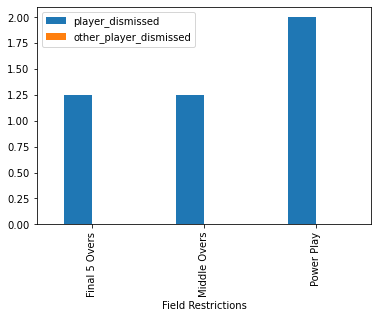

In [37]:
(rcb_won_batting_stats.groupby('Field Restrictions')['player_dismissed','other_player_dismissed'].count()/4).plot(kind='bar')

In [38]:
rcb_loss_batting_stats = rcb_batting[(rcb_batting['start_date']=='2009-05-24')|(rcb_batting['start_date']=='2010-04-21')|(rcb_batting['start_date']=='2011-05-24')|(rcb_batting['start_date']=='2011-05-28')|(rcb_batting['start_date']=='2015-05-22')|(rcb_batting['start_date']=='2016-05-29')|(rcb_batting['start_date']=='2020-11-06')|(rcb_batting['start_date']=='2021-10-11')|(rcb_batting['start_date']=='2022-05-27')]

<AxesSubplot:xlabel='Field Restrictions'>

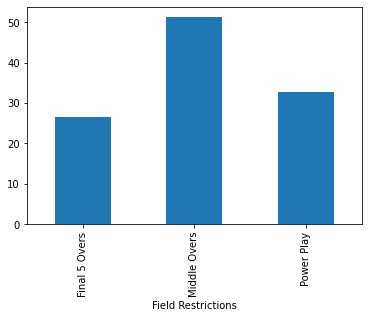

In [39]:
#number of watches RCB lose in playoffs from 2008-2021 = 8
# average runs per segment in winning playoff match
(rcb_loss_batting_stats.groupby('Field Restrictions')['runs_off_bat'].sum()/8).plot(kind='bar')

<AxesSubplot:xlabel='Field Restrictions'>

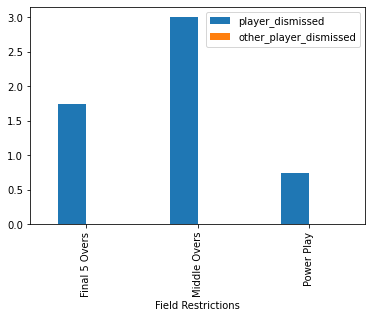

In [40]:
(rcb_loss_batting_stats.groupby('Field Restrictions')['player_dismissed','other_player_dismissed'].count()/8).plot(kind='bar')

<AxesSubplot:xlabel='Field Restrictions'>

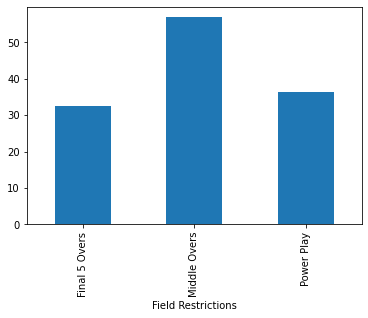

In [41]:
#number of watches RCB played in playoffs from 2008-2021 = 12
# average runs per segment in winning playoff match
(rcb_batting.groupby('Field Restrictions')['runs_off_bat'].sum()/12).plot(kind='bar')

In [42]:
rcb_batting.groupby('Field Restrictions')['player_dismissed','other_player_dismissed'].count()/12

,player_dismissed,other_player_dismissed
Field Restrictions,,
Final 5 Overs,1.583333,0.0
Middle Overs,2.416667,0.0
Power Play,1.166667,0.0


In [43]:
rcb_bowling = rcb_df[rcb_df['bowling_team']=='Royal Challengers Bangalore']

In [44]:
rcb_bowling.groupby('Field Restrictions')['runs_off_bat'].sum()

Field Restrictions
Final 5 Overs    443
Middle Overs     674
Power Play       413
Name: runs_off_bat, dtype: int64

In [45]:
rcb_batting.groupby('Field Restrictions')['player_dismissed','other_player_dismissed'].count()

,player_dismissed,other_player_dismissed
Field Restrictions,,
Final 5 Overs,19,0
Middle Overs,29,0
Power Play,14,0


In [46]:
rcb_won_bowling_stats= rcb_bowling[(rcb_bowling['start_date']=='2009-05-23')|(rcb_bowling['start_date']=='2011-05-27')|(rcb_bowling['start_date']=='2015-05-20')|(rcb_bowling['start_date']=='2016-05-24')|(rcb_bowling['start_date']=='2022-05-25')]

In [47]:
#number of watches RCB played in playoffs from 2008-2021 = 12
# average runs per segment in winning playoff match
rcb_won_bowling_stats.groupby('Field Restrictions')['runs_off_bat'].sum()/4

Field Restrictions
Final 5 Overs    34.00
Middle Overs     57.75
Power Play       41.00
Name: runs_off_bat, dtype: float64

In [48]:
rcb_won_bowling_stats.groupby('Field Restrictions')['player_dismissed','other_player_dismissed'].count()/4

,player_dismissed,other_player_dismissed
Field Restrictions,,
Final 5 Overs,3.00,0.0
Middle Overs,3.50,0.0
Power Play,1.75,0.0


In [49]:
rcb_loss_bowling_stats = rcb_bowling[(rcb_bowling['start_date']=='2009-05-24')|(rcb_bowling['start_date']=='2010-04-21')|(rcb_bowling['start_date']=='2011-05-24')|(rcb_bowling['start_date']=='2011-05-28')|(rcb_bowling['start_date']=='2015-05-22')|(rcb_bowling['start_date']=='2016-05-29')|(rcb_bowling['start_date']=='2020-11-06')|(rcb_bowling['start_date']=='2021-10-11')|(rcb_bowling['start_date']=='2022-05-27')]

In [50]:
#number of watches RCB lose in playoffs from 2008-2021 = 8
# average runs per segment in winning playoff match
rcb_loss_bowling_stats.groupby('Field Restrictions')['runs_off_bat'].sum()/8

Field Restrictions
Final 5 Overs    38.375
Middle Overs     55.375
Power Play       31.125
Name: runs_off_bat, dtype: float64

In [51]:
rcb_loss_bowling_stats.groupby('Field Restrictions')['player_dismissed','other_player_dismissed'].count()/8

,player_dismissed,other_player_dismissed
Field Restrictions,,
Final 5 Overs,1.875,0.0
Middle Overs,1.375,0.0
Power Play,0.875,0.0


In [52]:
#number of watches RCB played in playoffs from 2008-2021 = 12
# average runs per segment in winning playoff match
rcb_bowling.groupby('Field Restrictions')['runs_off_bat'].sum()/12

Field Restrictions
Final 5 Overs    36.916667
Middle Overs     56.166667
Power Play       34.416667
Name: runs_off_bat, dtype: float64

In [53]:
rcb_bowling.groupby('Field Restrictions')['player_dismissed','other_player_dismissed'].count()/12

,player_dismissed,other_player_dismissed
Field Restrictions,,
Final 5 Overs,2.250000,0.0
Middle Overs,2.083333,0.0
Power Play,1.166667,0.0


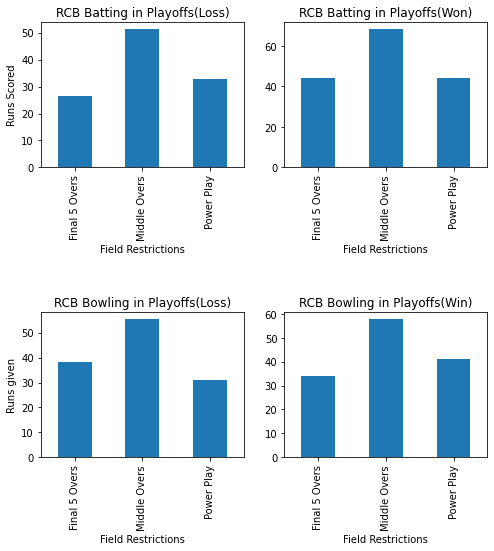

In [54]:
#batting and bowling analysis:
fig,axs = plt.subplots(2,2, figsize=(8,8))
plt.subplot(2,2,1)

plt.title('RCB Batting in Playoffs(Loss)')
plt.ylabel('Runs Scored')
(rcb_loss_batting_stats.groupby('Field Restrictions')['runs_off_bat'].sum()/8).plot(kind='bar')
plt.subplot(2,2,2)

plt.title('RCB Batting in Playoffs(Won)')
(rcb_won_batting_stats.groupby('Field Restrictions')['runs_off_bat'].sum()/4).plot(kind='bar')
plt.subplot(2,2,3)

plt.title('RCB Bowling in Playoffs(Loss)')
plt.ylabel('Runs given')
(rcb_loss_bowling_stats.groupby('Field Restrictions')['runs_off_bat'].sum()/8).plot(kind='bar')
plt.subplot(2,2,4)
plt.title('RCB Bowling in Playoffs(Win)')

(rcb_won_bowling_stats.groupby('Field Restrictions')['runs_off_bat'].sum()/4).plot(kind='bar')
plt.subplots_adjust(hspace=1)
plt.show()



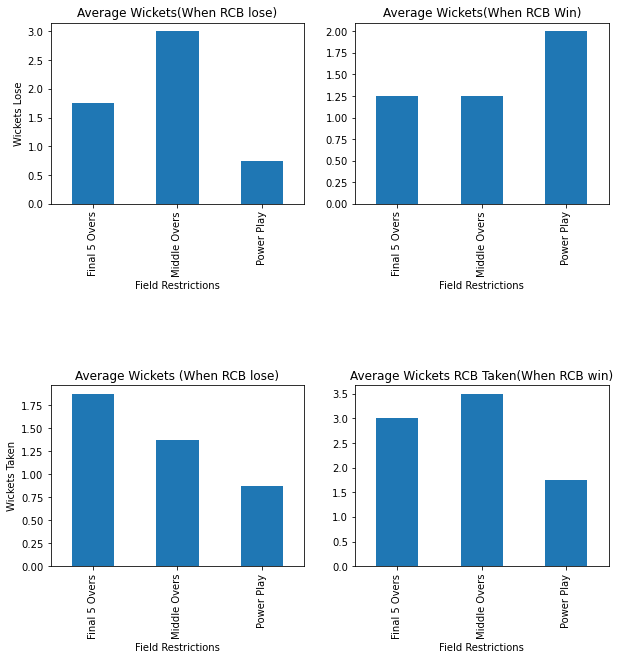

In [68]:
#Wickets Analysis:
fig,axs = plt.subplots(2,2, figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Average Wickets(When RCB lose)')
plt.ylabel('Wickets Lose')
(rcb_loss_batting_stats.groupby('Field Restrictions')['player_dismissed'].count()/8).plot(kind='bar')
plt.subplot(2,2,2)
plt.title('Average Wickets(When RCB Win)')
(rcb_won_batting_stats.groupby('Field Restrictions')['player_dismissed'].count()/4).plot(kind='bar')
plt.subplot(2,2,3)
plt.title('Average Wickets (When RCB lose)')
plt.ylabel('Wickets Taken')
(rcb_loss_bowling_stats.groupby('Field Restrictions')['player_dismissed'].count()/8).plot(kind='bar')
plt.subplot(2,2,4)
plt.title('Average Wickets RCB Taken(When RCB win)')
(rcb_won_bowling_stats.groupby('Field Restrictions')['player_dismissed'].count()/4).plot(kind='bar')
plt.subplots_adjust(hspace=1)
plt.show()


In [ ]:
#Conclusion:
# RCB given more runs in powerplay and middle overs when they win in play off's than we they lose in play off's
# RCB scored less runs in Powerplay, Middle Overs and Final overs when they lose in playoff's than when they win in play off's
# RCB lose more wickets in power play when they win in play off's than we they lose in play off's
# RCB taken less wicktes in in Powerplay, Middle Overs and Final overs when they lose in playoff's than when they win in play off's